# 1 Workflow to integrate the Athal1 (control samples) quantification files

#### Dataset1: Healthy - Arabidopsis (Col-0)

Cynthia Soto<br>
Fecha: 20 de Agosto 2020<br>
Ultima md: 3 de Febrero 2020 <br>
Datatype representation: expression levels CDS (gene_name) <br>
Data quantify with HTSeq (alignments done with STAR SA) <br>

***Case:*** <br>
The data quantifications produced with HTSeq are given in absolute values. Therefore, it is necessary to transform the data to some scale that is appropriate for further analysis. In this case, I will apply the Log2 transformation to the data after plus 1 to avoid arithmetic errors.

***Workflow:***<br>
1) Explore data & get the correct format (remove or add headers; remove not informative data, etc.)<br>
2) Get basic statics & counts in zeros.<br>
3) Transform absolute counts into Log2 counts. <br>
4) Get basic statics onto Log2 values. <br>
5) Create log2 files & statistics files in cvs format for further analysis. <br>


In [2]:
import pandas as pd
import numpy as np
import os 
import glob

In [3]:
try:
    # Change the current working Directory to the quantification dir
    #os.chdir("/home/cyntsc/Proyectos/athal1_htseq-counts/")
    os.chdir("/home/cyntsc/Proyectos/tesis-code/meta-xtrome-analysis/athal1_htseq-counts/")
    print("Directory changed")
except OSError:
    print("Can't change the Current Working Directory")
s_path=os.getcwd()
print(s_path)

Directory changed
/home/cyntsc/Proyectos/tesis-code/meta-xtrome-analysis/athal1_htseq-counts


In [4]:
#print(os.listdir(os.getcwd()) # list files in Dir
os.listdir(os.getcwd())

['all_log2_3_ceros.csv',
 'all_log2_6_ceros.csv',
 'SRR6283145',
 'Readme.md',
 'all_genesIDs_3cero',
 'SRR3383640_Log2.csv',
 'SRR6283144',
 'athal_gene_name.csv',
 'SRR3383821_Log2.csv',
 'all_log2_counter_cero.csv',
 'all_log2_dropped5ceros.csv',
 'SRR3383640',
 'SRR3383782_Log2.csv',
 'SRR6283145_Log2.csv',
 'wgcna_dataset1_thaliana_sana',
 'all_log2_dropped7ceros.csv',
 'all_log2_dropped4ceros.csv',
 'SRR3383641_Log2.csv',
 'SRR3383783_Log2.csv',
 'all_log2_7_ceros.csv',
 'SRR3383783',
 'all_genesIDs_4cero',
 'all_log2_dropped6ceros.csv',
 'SRR3383822_Log2.csv',
 'SRR3383782',
 'all_genesIDs_cero',
 'all_log2_8_ceros.csv',
 'SRR3383822',
 'all_log2_dropped8ceros.csv',
 'all_log2_5_ceros.csv',
 'all_samples_log2.csv',
 'all_log2_4_ceros.csv',
 'SRR6283144_Log2.csv',
 'SRR3383641',
 'all_genesIDs_7cero',
 'all_genesIDs_5cero',
 'all_genesIDs_6cero',
 'all_log2_dropped3ceros.csv',
 'SRR3383821']

In [5]:
for file in glob.glob("SRR*"):
    print(file)

SRR6283145
SRR3383640_Log2.csv
SRR6283144
SRR3383821_Log2.csv
SRR3383640
SRR3383782_Log2.csv
SRR6283145_Log2.csv
SRR3383641_Log2.csv
SRR3383783_Log2.csv
SRR3383783
SRR3383822_Log2.csv
SRR3383782
SRR3383822
SRR6283144_Log2.csv
SRR3383641
SRR3383821


### Here, are created two relevant data files:
<ol>
<li>The log2 transformated values: *_Log2.csv </li>
<li>The basic stats about the data distributions: *_stats.csv</li>
</ol>

In [54]:
## TRANSFORM values from absolute to log2
## Take in account to remove rows with statistic data produced by the quantification tool or meta-data that are not relevant in this point
## It is assumed that files contains just "Genes and Counts"
for file in glob.glob("SRR*"):
    #print(file)
    df= pd.read_csv(file, sep='\t', header=None)
    # Add column-names
    try:
        df.columns = ["Genes","Counts"]
        #print(df.head(3))
        #print(df.shape)
        #print(df.tail(5))
        df.drop(df.tail(5).index,inplace=True) # drop last n rows (refering statistics of HTSeq)
        #print(df.tail(5))
        ## Plus 1 to avoid arithmetical error in Log2 transformation (avoid error div/0)
        df["Counts"] += 1
        ## Apply Log2 numpy function to absolute values and add a column
        df['log2_value'] = np.log2(df['Counts'])
        #print(df.head(3))
        ## CREATE NEW file_Log2.csv
        #df.to_csv(str(file)+'_Log2.csv', sep='\t', index=True)
        
        ## check zero values across genes based on abs.val and log2.val to add to the basic stats df
        genes_in_cero = df.isin([0]).sum()
        #print(genes_in_cero)
        ## CREATE NEW file with basic statistics *_stats.csv
        df_stats=df.describe()
        #print(df_stats.columns)
        df_stats.loc['Zeros'] = [genes_in_cero['Counts'],genes_in_cero['log2_value']]
        # adding a row
        df_stats.loc['sample'] = [file, file]               # adding a row
        print(df_stats)       # print(df_stats.columns)
        #df_stats.to_csv('../results-data/'+str(file)+'_healthy_stats.csv', sep='\t')
    except:
        pass # doing nothing on exception, not processed because it is already pre-processed"

            Counts  log2_value
count        27655       27655
mean       633.651     5.30741
std        2953.75     4.18218
min              1           0
25%              1           0
50%             73     6.18982
75%            482     8.91289
max         141109     17.1065
Zeros            0        7688
sample  SRR6283145  SRR6283145
            Counts  log2_value
count        27655       27655
mean       707.541     5.26993
std        4073.44     4.19759
min              1           0
25%              1           0
50%             64           6
75%            470     8.87652
max         274645     18.0672
Zeros            0        7700
sample  SRR6283144  SRR6283144
            Counts  log2_value
count        27655       27655
mean       348.664     4.91934
std        1860.47     3.79107
min              1           0
25%              1           0
50%             53     5.72792
75%            282     8.13955
max         153438     17.2273
Zeros            0        7396
sample  

### Here all stats files are integrated in one file to plot it
Important note: when re-running this piece of code be sure to erase the **allsample_stats.csv** file from your work directory before running again

In [57]:
for file in glob.glob("../results-data/*healthy_stats.csv"):
   print(file)

../results-data/SRR6283144_healthy_stats.csv
../results-data/SRR6283145_healthy_stats.csv
../results-data/SRR3383641_healthy_stats.csv
../results-data/SRR3383640_healthy_stats.csv
../results-data/SRR3383822_healthy_stats.csv
../results-data/SRR3383821_healthy_stats.csv
../results-data/SRR3383783_healthy_stats.csv
../results-data/SRR3383782_healthy_stats.csv


In [58]:
bfirst_file=True
for file in glob.glob("../results-data/*_healthy_stats.csv"):
    print(file)
    df_tmp=pd.read_csv(file, sep='\t', header=None, index_col=False)
    #print(df_tmp)
    df = df_tmp.T
    df.drop(df.index[:1], inplace=True)
    # drop index 0 (somelike headers) -- rows
    if bfirst_file==True:
        df_all=df
        bfirst_file=False
        #print(df_all)
    else:
        df_all=df_all.append(df)
        #print(df_all)
        pass
    
print(df_all)
df_all.to_csv('../results-data/all_healthy_stats.csv', sep='\t', header=None, index=None)

../results-data/SRR6283144_healthy_stats.csv
../results-data/SRR6283145_healthy_stats.csv
../results-data/SRR3383641_healthy_stats.csv
../results-data/SRR3383640_healthy_stats.csv
../results-data/SRR3383822_healthy_stats.csv
../results-data/SRR3383821_healthy_stats.csv
../results-data/SRR3383783_healthy_stats.csv
../results-data/SRR3383782_healthy_stats.csv
            0        1                   2                   3    4    5  \
1      Counts  27655.0   707.5412041222202  4073.4434326360984  1.0  1.0   
2  log2_value  27655.0   5.269930743616318   4.197586969773496  0.0  0.0   
1      Counts  27655.0   633.6507322364853  2953.7515375596795  1.0  1.0   
2  log2_value  27655.0   5.307407306326486   4.182176471984372  0.0  0.0   
1      Counts  27655.0   717.3532815042488    3764.29342521545  1.0  1.0   
2  log2_value  27655.0  5.6200377131937085  4.2069014702594725  0.0  0.0   
1      Counts  27655.0    348.664328331224  1860.4692499293658  1.0  1.0   
2  log2_value  27655.0   4.91933

In [59]:
#set columns to apply filters by name
df_all.columns = ['Metric','count','mean','std','min','25%','50%','75%','max','Zeros','sample']


In [60]:
## Filter data for plotting the log2 statistics
is_log2=df_all['Metric']=='log2_value'
df_plot=df_all[is_log2] 
#df_plot.set_index('sample', inplace=True)
print(df_plot.index)
df_plot

Int64Index([2, 2, 2, 2, 2, 2, 2, 2], dtype='int64')


,Metric,count,mean,std,min,25%,50%,75%,max,Zeros,sample
2,log2_value,27655.0,5.269930743616318,4.197586969773496,0.0,0.0,6.0,8.876516946565,18.067208501807997,7700.0,SRR6283144
2,log2_value,27655.0,5.307407306326486,4.182176471984372,0.0,0.0,6.189824558880018,8.912889336229961,17.106450481091255,7688.0,SRR6283145
2,log2_value,27655.0,5.6200377131937085,4.2069014702594725,0.0,0.0,6.727920454563199,9.197216693110052,18.265074740410657,7039.0,SRR3383641
2,log2_value,27655.0,4.919338996809231,3.791072442387742,0.0,0.0,5.727920454563199,8.139551352398794,17.227296295103052,7396.0,SRR3383640
2,log2_value,27655.0,4.671514512940085,3.705816778099094,0.0,0.0,5.357552004618084,7.813781191217037,16.795786019502003,7702.0,SRR3383822
2,log2_value,27655.0,5.118317463224261,3.943576312846421,0.0,0.0,5.954196310386875,8.459431618637296,17.17939402746687,7360.0,SRR3383821
2,log2_value,27655.0,4.941991419748094,3.8915038468000707,0.0,0.0,5.700439718141092,8.247927513443585,18.268208444509813,7627.0,SRR3383783
2,log2_value,27655.0,5.701391209902577,4.242752919097512,0.0,1.0,6.7414669864011465,9.247927513443585,19.333620533971455,6888.0,SRR3383782


**Selection of metrics to be plotted and type conversions**

In [61]:
df_plot.dtypes
#df_plot["mean"] = df_plot['mean'].astype('float')
#df_plot.dtypes
# using apply method to get str to numeric dtype
df_plot[['mean','std','25%','50%','75%','max','Zeros']] = df_plot[['mean','std','25%','50%','75%','max','Zeros']].apply(pd.to_numeric)
print(df_plot.dtypes)
df_plot=df_plot.filter(['sample','mean','std','25%','50%','75%','max','Zeros']).round(decimals=3)
df_plot

Metric     object
count      object
mean      float64
std       float64
min        object
25%       float64
50%       float64
75%       float64
max       float64
Zeros     float64
sample     object
dtype: object


/home/cyntsc/Proyectos/tesis-code/jn_tesis_env/lib/python3.6/site-packages/pandas/core/frame.py:2963: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


,sample,mean,std,25%,50%,75%,max,Zeros
2,SRR6283144,5.270,4.198,0.0,6.000,8.877,18.067,7700.0
2,SRR6283145,5.307,4.182,0.0,6.190,8.913,17.106,7688.0
2,SRR3383641,5.620,4.207,0.0,6.728,9.197,18.265,7039.0
2,SRR3383640,4.919,3.791,0.0,5.728,8.140,17.227,7396.0
2,SRR3383822,4.672,3.706,0.0,5.358,7.814,16.796,7702.0
2,SRR3383821,5.118,3.944,0.0,5.954,8.459,17.179,7360.0
2,SRR3383783,4.942,3.892,0.0,5.700,8.248,18.268,7627.0
2,SRR3383782,5.701,4.243,1.0,6.741,9.248,19.334,6888.0



###  Adding labels for plotting (leyends)

In [62]:
file='../meta-data/ID_samples.csv'
lst_header=["sample","huesped","condicion","fungus","ID"] 
df_meta=pd.read_csv(file, sep='\,', engine='python', usecols=[0,4]) 
print(df_meta.index)
print(df_meta)
#df_meta.loc['SRR3383696']

RangeIndex(start=0, stop=25, step=1)
         sample         ID
0     SRR364389       Ch22
1     SRR364400       Ch40
2     SRR364401       Ch40
3     SRR364390       Ch22
4     SRR364391       Ch22
5     SRR364392       Ch22
6     SRR364398       Ch40
7     SRR364399       Ch40
8    SRR3383696       Bc12
9    SRR3383697       Bc12
10   SRR3383779       Bc18
11   SRR3383780       Bc18
12  SRR10586397       Bc24
13  SRR10586399       Bc24
14   SRR6283146       Ss30
15   SRR6283147       Ss30
16   SRR6283148       Ss30
17   SRR3383640  healthy12
18   SRR3383641  healthy12
19   SRR3383782  healthy18
20   SRR3383783  healthy18
21   SRR3383821  healthy24
22   SRR3383822  healthy24
23   SRR6283144  healthy30
24   SRR6283145  healthy30


### Join data-stats with meta-data labels

In [66]:
merged_df=df_plot.merge(df_meta, how="left")
merged_df=merged_df.sort_values('ID')
merged_df

,sample,mean,std,25%,50%,75%,max,Zeros,ID
2,SRR3383641,5.620,4.207,0.0,6.728,9.197,18.265,7039.0,healthy12
3,SRR3383640,4.919,3.791,0.0,5.728,8.140,17.227,7396.0,healthy12
6,SRR3383783,4.942,3.892,0.0,5.700,8.248,18.268,7627.0,healthy18
7,SRR3383782,5.701,4.243,1.0,6.741,9.248,19.334,6888.0,healthy18
4,SRR3383822,4.672,3.706,0.0,5.358,7.814,16.796,7702.0,healthy24
5,SRR3383821,5.118,3.944,0.0,5.954,8.459,17.179,7360.0,healthy24
0,SRR6283144,5.270,4.198,0.0,6.000,8.877,18.067,7700.0,healthy30
1,SRR6283145,5.307,4.182,0.0,6.190,8.913,17.106,7688.0,healthy30


### Get and sort specific column of interest 

In [67]:
## Ex: zeros field 
df_tmp= merged_df.sort_values('ID')
#df_tmp
col_ceros = df_tmp['Zeros'].tolist()
col_ceros.sort(reverse=False)
print(col_ceros)
#newlst

[6888.0, 7039.0, 7360.0, 7396.0, 7627.0, 7688.0, 7700.0, 7702.0]


### Plot quantification metrics 

In [68]:
import matplotlib.pyplot as plt
# plt.style.available[:10]    
# 'Solarize_Light2','_classic_test_patch', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale',  'seaborn'

In [22]:
plt.style.use('seaborn-white')    # classic
# kind : str

#         ‘line’ : line plot (default)
#         ‘bar’ : vertical bar plot
#         ‘barh’ : horizontal bar plot
#         ‘hist’ : histogram
#         ‘box’ : boxplot
#         ‘kde’ : Kernel Density Estimation plot
#         ‘density’ : same as ‘kde’
#         ‘area’ : area plot
#         ‘pie’ : pie plot
#         ‘scatter’ : scatter plot
#         ‘hexbin’ : hexbin plot

<AxesSubplot:>

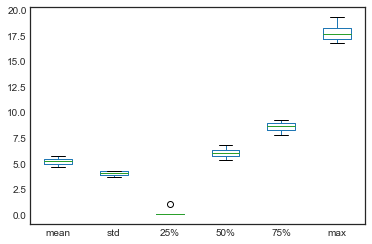

In [74]:
merged_df.plot(x='ID', y=['mean','std','25%','50%','75%','max'], kind='box') 
#merged_df.plot(x='ID', y=['mean','std','25%','50%','75%','max'], kind='bar')

/home/cyntsc/Proyectos/tesis-code/jn_tesis_env/lib/python3.6/site-packages/pandas/plotting/_matplotlib/core.py:1192: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


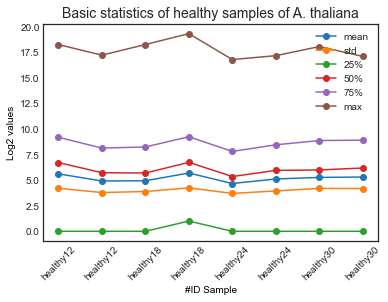

<Figure size 432x288 with 0 Axes>

In [75]:
## be careful to assure your metrics can be plotted in the same dimensions
## Ex: zero field is out of range respecting the other measures
merged_df.plot(x='ID', y=['mean','std','25%','50%','75%','max'], kind='line',marker='o')   #marker='o'
plt.xlabel('#ID Sample',color='black')
plt.xticks(rotation=45)
plt.ylabel('Log2 values',color='black')
plt.title('Basic statistics of healthy samples of A. thaliana', fontsize=14)
plt.legend(loc=1)
plt.show()
plt.savefig("../results-data/athal_healthy_basic_stats.png")

### Plot of genes with cero count by sample
To plot the lines in the chart (ceros across samples) you first need to merge samples <br>
If you want to try jump to notebook **3_merge_dataframes_healthy** to get the cero counts information

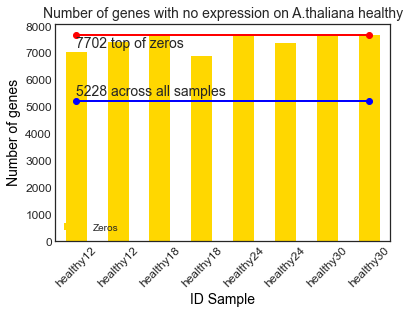

<Figure size 432x288 with 0 Axes>

In [86]:
# More plots
merged_df.plot(x='ID', y='Zeros', kind='bar', color='gold',fontsize=12)
plt.xlabel('ID Sample',color='black',fontsize=14)
plt.xticks(rotation=45)
plt.ylabel('Number of genes',color='black',fontsize=14)
plt.title('Number of genes with no expression on A.thaliana healthy', fontsize=14)
#plt.legend(loc=10)

## add arbitrary lines to canvas
plt.plot([0, 7], [7688, 7688], 'k-', lw=2, color='red',marker = 'o')
plt.plot([0, 7], [5228, 5228], 'k-', lw=2, color='blue',marker = 'o')
plt.text(0, 7200, "7702 top of zeros",fontsize=14)
plt.text(0, 5400, "5228 across all samples",fontsize=14)

plt.show()
plt.savefig("../plots/all_healthy_num_zeros.png")